<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#PROFYLE" data-toc-modified-id="PROFYLE-5">PROFYLE</a></span><ul class="toc-item"><li><span><a href="#RNA" data-toc-modified-id="RNA-5.1">RNA</a></span></li><li><span><a href="#CapTCR-Seq" data-toc-modified-id="CapTCR-Seq-5.2">CapTCR-Seq</a></span></li><li><span><a href="#Bind-RNA-and-Cap" data-toc-modified-id="Bind-RNA-and-Cap-5.3">Bind RNA and Cap</a></span></li></ul></li><li><span><a href="#ICGC" data-toc-modified-id="ICGC-6">ICGC</a></span><ul class="toc-item"><li><span><a href="#CapTCR-Seq" data-toc-modified-id="CapTCR-Seq-6.1">CapTCR-Seq</a></span></li><li><span><a href="#Bind-RNA-and-Cap" data-toc-modified-id="Bind-RNA-and-Cap-6.2">Bind RNA and Cap</a></span></li></ul></li><li><span><a href="#NPC" data-toc-modified-id="NPC-7">NPC</a></span><ul class="toc-item"><li><span><a href="#RNA" data-toc-modified-id="RNA-7.1">RNA</a></span></li><li><span><a href="#CapTCR-Seq" data-toc-modified-id="CapTCR-Seq-7.2">CapTCR-Seq</a></span></li><li><span><a href="#Bind-RNA-and-Cap" data-toc-modified-id="Bind-RNA-and-Cap-7.3">Bind RNA and Cap</a></span></li></ul></li><li><span><a href="#Analysis-of-diversity-measures" data-toc-modified-id="Analysis-of-diversity-measures-8">Analysis of diversity measures</a></span><ul class="toc-item"><li><span><a href="#linear-regression" data-toc-modified-id="linear-regression-8.1">linear regression</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
library(Hmisc)
library(broom)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




# Functions

In [2]:
source("~/OneDrive - UHN/R_src/Immune_diversity.R")
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")

# Paths

In [3]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

In [4]:
mordpath <- "/Users/anabbi/Desktop/Sam/immpedcan/mixcr/PROFYLE/RNAseq/"
h4hpath <- "/Users/anabbi/Desktop/H4H/immpedcan/PROFYLE/mixcr/"

# Main

# PROFYLE

## RNA

In [13]:
profyle_rna <- list.files(mordpath, pattern = "CLONES_TRB", recursive = T)

In [15]:
trb_list_profyle_rna <- immunelistfx(profyle_rna, mordpath, "TRB")

In [16]:
trb_list_profyle_rna <- trb_list_profyle_rna[sapply(trb_list_profyle_rna, function(x) length(unlist(x))) > 1] # remove files with one clonotype
                            
length(trb_list_profyle_rna)

[1] 6

In [17]:
trb_list_profyle_rna <- trb_list_profyle_rna[sapply(trb_list_profyle_rna, function(x) var(unlist(x))) > 0] # remove files no variance                        

In [18]:
length(trb_list_profyle_rna)

[1] 4

In [19]:
div_trb_profyle_rna <- Divstats.fx(trb_list_profyle_rna, "TRB")

In [20]:
div_trb_profyle_rna

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,observed_Richness,estimated_Richness,SE_Richeness,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson
clones/CLONES_TRB_PRO-00012N_R_totalRNA_chondrosarcoma_40055.txt,47,72,652.7778,1.531915,1.5390531,17,39,5,81.288,0.584,47,196.988,83.406,30.566,89.916,28.789,14.164,17.388,6.927
clones/CLONES_TRB_PRO-00013P_R_totalRNA_osteosarcoma_40063.txt,3,13,230.7692,4.333333,1.1383576,10,1,1,3.399,0.991,3,3.462,1.236,1.988,2.225,0.646,1.610,1.696,0.504
clones/CLONES_TRB_PRO-00015S_R_totalRNA_sarcoma_40065.txt,15,17,882.3529,1.133333,0.4556451,3,14,0,27.859,0.307,15,100.647,47.553,14.004,88.167,38.124,12.565,12.565,36.911
clones/CLONES_TRB_PRO-00019W_R_totalRNA_Thymus_40073.txt,1215,1421,855.0317,1.169547,0.3615564,4,1030,166,2095.307,0.475,1215,4408.233,322.829,1152.785,4409.446,208.632,1074.636,4405.721,195.507


In [21]:
save(div_trb_profyle_rna, file = paste0(datapath, "diversity/div_trb_profyle_rna.RData"))

In [22]:
div_trb_profyle_rna <- as.data.frame(div_trb_profyle_rna)

In [23]:
div_trb_profyle_rna$sample_id <- gsub(".*TRB_", "", rownames(div_trb_profyle_rna))

div_trb_profyle_rna$sample_id <- gsub("_R_.*", "", div_trb_profyle_rna$sample_id)

In [24]:
div_trb_profyle_rna$sample_id

[1] "PRO-00012N" "PRO-00013P" "PRO-00015S" "PRO-00019W"

## CapTCR-Seq

In [31]:
profyle_cap <- list.files(h4hpath, pattern = "CLONES_TRB", recursive = T)

In [32]:
profyle_cap

[1] "clones/CLONES_TRBPRO-00012N.txt" "clones/CLONES_TRBPRO-00013P.txt"
 [3] "clones/CLONES_TRBPRO-00015S.txt" "clones/CLONES_TRBPRO-00023A.txt"
 [5] "clones/CLONES_TRBPRO-00027E.txt" "clones/CLONES_TRBPRO-00032L.txt"
 [7] "clones/CLONES_TRBPRO-00033M.txt" "clones/CLONES_TRBPRO-00035O.txt"
 [9] "clones/CLONES_TRBPRO-00039T.txt" "clones/CLONES_TRBPRO-00042X.txt"
[11] "clones/CLONES_TRBPRO-00043Z.txt"

In [33]:
trb_list_profyle_cap <- immunelistfx(profyle_cap, h4hpath, "TRB")

In [34]:
length(trb_list_profyle_cap)

[1] 11

In [35]:
trb_list_profyle_cap <- trb_list_profyle_cap[sapply(trb_list_profyle_cap, function(x) length(unlist(x))) > 1] # remove files with one clonotype
                            
length(trb_list_profyle_cap)

[1] 9

In [36]:
trb_list_profyle_cap <- trb_list_profyle_cap[sapply(trb_list_profyle_cap, function(x) var(unlist(x))) > 0] # remove files no variance                        

In [37]:
length(trb_list_profyle_cap)

[1] 9

In [38]:
div_trb_profyle_cap <- Divstats.fx(trb_list_profyle_cap, "TRB")

In [39]:
div_trb_profyle_cap

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,observed_Richness,estimated_Richness,SE_Richeness,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson
clones/CLONES_TRBPRO-00012N.txt,1152,7575348,0.15207222,6575.823,8.276624,1510148,358,114,1416.791,1,1152,1714.123,82.852,53.468,53.475,0.037,16.589,16.589,0.015
clones/CLONES_TRBPRO-00013P.txt,5,19533,0.25597706,3906.600,2.085137,18468,0,0,5.000,1,5,5.000,0.218,1.285,1.285,0.007,1.117,1.117,0.003
clones/CLONES_TRBPRO-00015S.txt,536,1023792,0.52354384,1910.060,4.539396,116823,82,19,601.624,1,536,712.947,57.898,63.787,63.809,0.102,24.852,24.853,0.052
clones/CLONES_TRBPRO-00023A.txt,102,483655,0.21089413,4741.716,2.318769,92653,29,8,124.289,1,102,154.562,27.910,28.426,28.430,0.043,16.129,16.130,0.051
clones/CLONES_TRBPRO-00033M.txt,24,118734,0.20213250,4947.250,1.925753,31359,7,4,28.172,1,24,30.125,6.078,5.986,5.987,0.012,5.270,5.270,0.010
clones/CLONES_TRBPRO-00035O.txt,6,66679,0.08998335,11113.167,2.445568,66590,3,1,8.190,1,6,10.500,7.194,1.011,1.011,0.001,1.003,1.003,0.000
clones/CLONES_TRBPRO-00039T.txt,24,386262,0.06213399,16094.250,2.764918,214789,3,3,25.297,1,24,25.500,2.291,4.517,4.517,0.009,2.882,2.882,0.006
clones/CLONES_TRBPRO-00042X.txt,2,4590,0.43572985,2295.000,1.412981,4588,0,1,2.000,1,2,2.000,0.342,1.004,1.004,0.002,1.001,1.001,0.001
clones/CLONES_TRBPRO-00043Z.txt,98,267465,0.36640308,2729.235,6.324232,162838,25,10,115.208,1,98,129.250,16.887,3.324,3.325,0.007,2.415,2.415,0.006


In [40]:
save(div_trb_profyle_cap, file = paste0(datapath, "diversity/div_trb_profyle_cap.RData"))

In [41]:
div_trb_profyle_cap <- as.data.frame(div_trb_profyle_cap)

In [42]:
div_trb_profyle_cap$sample_id <- gsub(".*TRB", "", rownames(div_trb_profyle_cap))

div_trb_profyle_cap$sample_id <- gsub(".txt", "", div_trb_profyle_cap$sample_id)

In [43]:
head(div_trb_profyle_cap)

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,observed_Richness,estimated_Richness,SE_Richeness,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
clones/CLONES_TRBPRO-00012N.txt,1152,7575348,0.15207222,6575.823,8.276624,1510148,358,114,1416.791,1,1152,1714.123,82.852,53.468,53.475,0.037,16.589,16.589,0.015,PRO-00012N
clones/CLONES_TRBPRO-00013P.txt,5,19533,0.25597706,3906.600,2.085137,18468,0,0,5.000,1,5,5.000,0.218,1.285,1.285,0.007,1.117,1.117,0.003,PRO-00013P
clones/CLONES_TRBPRO-00015S.txt,536,1023792,0.52354384,1910.060,4.539396,116823,82,19,601.624,1,536,712.947,57.898,63.787,63.809,0.102,24.852,24.853,0.052,PRO-00015S
clones/CLONES_TRBPRO-00023A.txt,102,483655,0.21089413,4741.716,2.318769,92653,29,8,124.289,1,102,154.562,27.910,28.426,28.430,0.043,16.129,16.130,0.051,PRO-00023A
clones/CLONES_TRBPRO-00033M.txt,24,118734,0.20213250,4947.250,1.925753,31359,7,4,28.172,1,24,30.125,6.078,5.986,5.987,0.012,5.270,5.270,0.010,PRO-00033M
clones/CLONES_TRBPRO-00035O.txt,6,66679,0.08998335,11113.167,2.445568,66590,3,1,8.190,1,6,10.500,7.194,1.011,1.011,0.001,1.003,1.003,0.000,PRO-00035O


## Bind RNA and Cap

In [44]:
colnames(div_trb_profyle_cap)[1:ncol(div_trb_profyle_cap)-1] <-
paste0(colnames(div_trb_profyle_cap)[1:ncol(div_trb_profyle_cap)-1], "_TCRCap")

In [45]:
colnames(div_trb_profyle_rna)[1:ncol(div_trb_profyle_rna)-1] <-
paste0(colnames(div_trb_profyle_rna)[1:ncol(div_trb_profyle_rna)-1], "_RNAseq")

In [46]:
colnames(div_trb_profyle_rna)

[1] "TRB_RNAseq"                "Reads_RNAseq"             
 [3] "CPKR_RNAseq"               "Average_reads_RNAseq"     
 [5] "VMR_RNAseq"                "Max_reads_RNAseq"         
 [7] "Singletons_RNAseq"         "Doubletons_RNAseq"        
 [9] "qD_RNAseq"                 "Sample_Coverage_RNAseq"   
[11] "observed_Richness_RNAseq"  "estimated_Richness_RNAseq"
[13] "SE_Richeness_RNAseq"       "observed_Shannon_RNAseq"  
[15] "estimated_Shannon_RNAseq"  "SE_Shannon_RNAseq"        
[17] "observed_Simpson_RNAseq"   "estimated_Simpson_RNAseq" 
[19] "SE_Simpson_RNAseq"         "sample_id"

In [47]:
div_trb_profyle_cap_rna <- merge(div_trb_profyle_cap, div_trb_profyle_rna, by = "sample_id")

# ICGC

## CapTCR-Seq

In [48]:
icgcpath <- "/Users/anabbi/Desktop/H4H/immpedcan/ICGC/"

In [49]:
icgc_cap <- list.files(icgcpath, pattern = "CLONES_TRB", recursive = T)

In [50]:
icgc_cap <- icgc_cap[!grepl("MiSeq", icgc_cap)]

icgc_cap <- icgc_cap[!grepl("ds_batch", icgc_cap)]

In [51]:
icgc_cap

[1] "batch1/mixcr/clones/CLONES_TRBICGC_GBM1.txt" 
 [2] "batch1/mixcr/clones/CLONES_TRBICGC_GBM2.txt" 
 [3] "batch1/mixcr/clones/CLONES_TRBICGC_GBM28.txt"
 [4] "batch1/mixcr/clones/CLONES_TRBICGC_GBM32.txt"
 [5] "batch1/mixcr/clones/CLONES_TRBICGC_GBM38.txt"
 [6] "batch1/mixcr/clones/CLONES_TRBICGC_GBM53.txt"
 [7] "batch1/mixcr/clones/CLONES_TRBICGC_GBM58.txt"
 [8] "batch1/mixcr/clones/CLONES_TRBICGC_GBM6.txt" 
 [9] "batch2/mixcr/clones/CLONES_TRBICGC_GBM4.txt" 
[10] "batch2/mixcr/clones/CLONES_TRBICGC_GBM56.txt"

In [52]:
trb_list_icgc_cap <- immunelistfx(icgc_cap, icgcpath, "TRB")

In [53]:
length(trb_list_icgc_cap)

[1] 10

In [54]:
trb_list_icgc_cap <- trb_list_icgc_cap[sapply(trb_list_icgc_cap, function(x) length(unlist(x))) > 1] # remove files with one clonotype
                            
length(trb_list_icgc_cap)

[1] 10

In [55]:
trb_list_icgc_cap <- trb_list_icgc_cap[sapply(trb_list_icgc_cap, function(x) var(unlist(x))) > 0] # remove files no variance                        

In [56]:
length(trb_list_icgc_cap)

[1] 10

In [57]:
div_trb_icgc_cap <- Divstats.fx(trb_list_icgc_cap, "TRB")

In [58]:
div_trb_icgc_cap

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,observed_Richness,estimated_Richness,SE_Richeness,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson
batch1/mixcr/clones/CLONES_TRBICGC_GBM1.txt,30,649,46.224961,21.63333,2.7320230,313,5,7,31.674,1.000,30,31.783,2.186,6.946,7.128,0.392,3.652,3.667,0.210
batch1/mixcr/clones/CLONES_TRBICGC_GBM2.txt,37,1434,25.801953,38.75676,3.3840113,763,8,5,41.564,0.998,37,43.396,5.918,5.526,5.617,0.218,3.047,3.052,0.110
batch1/mixcr/clones/CLONES_TRBICGC_GBM28.txt,19,869,21.864212,45.73684,2.3790594,460,5,1,23.119,0.996,19,31.486,17.120,4.721,4.802,0.214,2.986,2.993,0.123
batch1/mixcr/clones/CLONES_TRBICGC_GBM32.txt,177,1938,91.331269,10.94915,3.7159476,519,24,19,189.040,0.997,177,192.150,8.092,50.295,53.035,2.356,12.016,12.085,0.773
batch1/mixcr/clones/CLONES_TRBICGC_GBM38.txt,11,615,17.886179,55.90909,2.0584413,389,2,1,12.263,0.999,11,12.997,3.736,3.309,3.344,0.148,2.267,2.272,0.111
batch1/mixcr/clones/CLONES_TRBICGC_GBM53.txt,17,2012,8.449304,118.35294,2.6796651,1304,3,1,19.189,0.999,17,21.498,7.190,3.334,3.351,0.092,2.191,2.193,0.056
batch1/mixcr/clones/CLONES_TRBICGC_GBM58.txt,134,2076,64.547206,15.49254,3.2178316,549,13,5,143.066,0.997,134,150.892,12.718,43.980,45.666,1.666,11.882,11.945,0.683
batch1/mixcr/clones/CLONES_TRBICGC_GBM6.txt,32,1547,20.685197,48.34375,3.0431747,790,4,2,34.527,0.999,32,35.997,5.288,6.090,6.163,0.264,3.209,3.214,0.115
batch2/mixcr/clones/CLONES_TRBICGC_GBM4.txt,8,80,100.000000,10.00000,0.6391959,18,2,0,8.854,0.997,8,8.988,2.223,6.348,6.708,0.322,5.893,6.282,0.433
batch2/mixcr/clones/CLONES_TRBICGC_GBM56.txt,4,112,35.714286,28.00000,0.4870779,40,0,0,4.000,1.000,4,4.000,0.007,3.611,3.660,0.131,3.396,3.471,0.187


In [59]:
save(div_trb_icgc_cap, file = paste0(datapath, "diversity/div_trb_icgc_cap.RData"))

In [60]:
div_trb_icgc_cap <- as.data.frame(div_trb_icgc_cap)

In [61]:
div_trb_icgc_cap$sample_id <- gsub(".*TRB", "", rownames(div_trb_icgc_cap))

div_trb_icgc_cap$sample_id <- gsub(".txt", "", div_trb_icgc_cap$sample_id)

In [62]:
div_trb_icgc_cap

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,observed_Richness,estimated_Richness,SE_Richeness,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
batch1/mixcr/clones/CLONES_TRBICGC_GBM1.txt,30,649,46.224961,21.63333,2.7320230,313,5,7,31.674,1.000,30,31.783,2.186,6.946,7.128,0.392,3.652,3.667,0.210,ICGC_GBM1
batch1/mixcr/clones/CLONES_TRBICGC_GBM2.txt,37,1434,25.801953,38.75676,3.3840113,763,8,5,41.564,0.998,37,43.396,5.918,5.526,5.617,0.218,3.047,3.052,0.110,ICGC_GBM2
batch1/mixcr/clones/CLONES_TRBICGC_GBM28.txt,19,869,21.864212,45.73684,2.3790594,460,5,1,23.119,0.996,19,31.486,17.120,4.721,4.802,0.214,2.986,2.993,0.123,ICGC_GBM28
batch1/mixcr/clones/CLONES_TRBICGC_GBM32.txt,177,1938,91.331269,10.94915,3.7159476,519,24,19,189.040,0.997,177,192.150,8.092,50.295,53.035,2.356,12.016,12.085,0.773,ICGC_GBM32
batch1/mixcr/clones/CLONES_TRBICGC_GBM38.txt,11,615,17.886179,55.90909,2.0584413,389,2,1,12.263,0.999,11,12.997,3.736,3.309,3.344,0.148,2.267,2.272,0.111,ICGC_GBM38
batch1/mixcr/clones/CLONES_TRBICGC_GBM53.txt,17,2012,8.449304,118.35294,2.6796651,1304,3,1,19.189,0.999,17,21.498,7.190,3.334,3.351,0.092,2.191,2.193,0.056,ICGC_GBM53
batch1/mixcr/clones/CLONES_TRBICGC_GBM58.txt,134,2076,64.547206,15.49254,3.2178316,549,13,5,143.066,0.997,134,150.892,12.718,43.980,45.666,1.666,11.882,11.945,0.683,ICGC_GBM58
batch1/mixcr/clones/CLONES_TRBICGC_GBM6.txt,32,1547,20.685197,48.34375,3.0431747,790,4,2,34.527,0.999,32,35.997,5.288,6.090,6.163,0.264,3.209,3.214,0.115,ICGC_GBM6
batch2/mixcr/clones/CLONES_TRBICGC_GBM4.txt,8,80,100.000000,10.00000,0.6391959,18,2,0,8.854,0.997,8,8.988,2.223,6.348,6.708,0.322,5.893,6.282,0.433,ICGC_GBM4


## Bind RNA and Cap

In [63]:
load(file = paste0(datapath, "diversity/metadata_IC_TRB.RData"))

In [64]:
colnames(div_trb_icgc_cap)[1:ncol(div_trb_icgc_cap)-1] <-
paste0(colnames(div_trb_icgc_cap)[1:ncol(div_trb_icgc_cap)-1], "_TCRCap")

In [65]:
icgc_trb_rna <- metadata_IC_TRB[ metadata_IC_TRB$group == "ICGC",c(25:43,1)]

In [66]:
colnames(icgc_trb_rna)[1:ncol(icgc_trb_rna)-1] <-
paste0(colnames(icgc_trb_rna)[1:ncol(icgc_trb_rna)-1], "_RNAseq")

In [67]:
div_trb_icgc_cap_rna <- merge(div_trb_icgc_cap,
                                icgc_trb_rna, by = "sample_id")

In [68]:
dim(div_trb_icgc_cap_rna)

[1]  4 39

# NPC

## RNA

In [69]:
npc_rna <- list.files(paste0(datapath, "mixcr/NPC/clones/"), pattern = "CLONES_TRB", recursive = T)

In [70]:
trb_list_npc_rna <- immunelistfx(npc_rna, paste0(datapath, "mixcr/NPC/clones/"), "TRB")

In [71]:
trb_list_npc_rna <- trb_list_npc_rna[sapply(trb_list_npc_rna, function(x) length(unlist(x))) > 1] # remove files with one clonotype
                            
length(trb_list_npc_rna)

[1] 39

In [72]:
trb_list_npc_rna <- trb_list_npc_rna[sapply(trb_list_npc_rna, function(x) var(unlist(x))) > 0] # remove files no variance                        

In [73]:
length(trb_list_npc_rna)

[1] 38

In [74]:
div_trb_npc_rna <- Divstats.fx(trb_list_npc_rna, "TRB")

In [75]:
head(div_trb_npc_rna)

,TRB,Reads,CPKR,Average_reads,VMR,Max_reads,Singletons,Doubletons,qD,Sample_Coverage,observed_Richness,estimated_Richness,SE_Richeness,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson
CLONES_TRB104FF.txt,3,24,125.0000,8.000000,0.3307189,11,0,0,3.000,1.000,3,3.000,0.058,2.897,3.024,0.177,2.796,3.033,0.316
CLONES_TRB107JP.txt,23,66,348.4848,2.869565,0.4734587,5,4,6,24.246,0.997,23,24.313,1.823,20.578,25.014,1.881,18.939,26.159,2.443
CLONES_TRB108W03.txt,19,52,365.3846,2.736842,0.5286810,6,3,8,19.549,1.000,19,19.552,0.998,16.748,20.379,1.958,15.022,20.719,2.429
CLONES_TRB10C02.txt,7,17,411.7647,2.428571,0.7075145,6,2,3,7.594,0.995,7,7.627,1.243,5.826,7.292,1.657,4.898,6.476,1.926
CLONES_TRB116JC.txt,16,57,280.7018,3.562500,0.5516700,7,3,2,17.632,0.987,16,18.211,3.342,13.771,16.264,1.496,12.448,15.647,1.635
CLONES_TRB119AY.txt,11,29,379.3103,2.636364,0.8183391,8,4,3,13.008,0.971,11,13.575,3.378,8.546,10.980,2.103,6.837,8.638,2.203


In [76]:
save(div_trb_npc_rna, file = paste0(datapath, "diversity/div_trb_npc_rna.RData"))

In [77]:
div_trb_npc_rna <- as.data.frame(div_trb_npc_rna)

In [78]:
div_trb_npc_rna$sample_id <- gsub(".*TRB", "", rownames(div_trb_npc_rna))

div_trb_npc_rna$sample_id <- gsub(".txt", "", div_trb_npc_rna$sample_id)

In [79]:
div_trb_npc_rna$sample_id

[1] "104FF"  "107JP"  "108W03" "10C02"  "116JC"  "119AY"  "119S01" "12109" 
 [9] "124M02" "126Q03" "130YL"  "133B01" "14Y05"  "18W06"  "24VP"   "32S04" 
[17] "43K03"  "48S07"  "51M07"  "58C06"  "5Z05"   "60S03"  "68W02"  "70WS"  
[25] "72C06"  "73M07"  "79HZ"   "79L01"  "83CG"   "8C07"   "91MO"   "98KK"  
[33] "9AW"    "N1"     "N4"     "N5"     "N6"     "N7"

Remove normal tissues

In [80]:
div_trb_npc_rna <- div_trb_npc_rna[!div_trb_npc_rna$sample_id %in% c("N1", "N4", "N5", "N6", "N7"),]

In [81]:
dim(div_trb_npc_rna)

[1] 33 20

## CapTCR-Seq

In [82]:
npc_cap <- list.files(paste0(datapath, "mixcr/NPC/TCRcap/"), pattern = "CLONES_TRB", recursive = T)

In [83]:
# downsampled to two million

npc_cap <- npc_cap[ grepl("2000000", npc_cap)]

In [84]:
trb_list_npc_cap <- immunelistfx(npc_cap, paste0(datapath, "mixcr/NPC/TCRcap/"), "TRB")

In [85]:
length(trb_list_npc_cap)

[1] 28

In [86]:
trb_list_npc_cap <- trb_list_npc_cap[sapply(trb_list_npc_cap, function(x) length(unlist(x))) > 1] # remove files with one clonotype
                            
length(trb_list_npc_cap)

[1] 28

In [87]:
trb_list_npc_cap <- trb_list_npc_cap[sapply(trb_list_npc_cap, function(x) var(unlist(x))) > 0] # remove files no variance                        

In [88]:
div_trb_npc_cap <- Divstats.fx(trb_list_npc_cap, "TRB")

In [89]:
save(div_trb_npc_cap, file = paste0(datapath, "diversity/div_trb_npc_cap.RData"))

In [90]:
div_trb_npc_cap <- as.data.frame(div_trb_npc_cap)

In [91]:
div_trb_npc_cap$sample_id <- gsub(".*NPC_", "", rownames(div_trb_npc_cap))

div_trb_npc_cap$sample_id <- gsub("_2000000.txt", "", div_trb_npc_cap$sample_id)

In [92]:
div_trb_npc_cap$sample_id

[1] "107JP"  "108W03" "111S03" "116JC"  "119AY"  "119S01" "12109"  "14Y05" 
 [9] "18W06"  "29MT"   "32S04"  "43K03"  "47B08"  "51M07"  "58C06"  "59GA"  
[17] "70WS"   "72C06"  "79HZ"   "79L01"  "83CG"   "8C07"   "91MO"   "9AW"   
[25] "N1"     "N4"     "N5"     "N6"

remove Ns

In [93]:
div_trb_npc_cap <- div_trb_npc_cap[ !div_trb_npc_cap$sample_id %in% c("N1", "N4", "N5", "N6"),]

## Bind RNA and Cap

In [94]:
colnames(div_trb_npc_rna)

[1] "TRB"                "Reads"              "CPKR"              
 [4] "Average_reads"      "VMR"                "Max_reads"         
 [7] "Singletons"         "Doubletons"         "qD"                
[10] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[13] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[16] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[19] "SE_Simpson"         "sample_id"

In [95]:
colnames(div_trb_npc_cap)[1:ncol(div_trb_npc_cap)-1] <-
paste0(colnames(div_trb_npc_cap)[1:ncol(div_trb_npc_cap)-1], "_TCRCap")

In [96]:
colnames(div_trb_npc_rna)[1:ncol(div_trb_npc_rna)-1] <-
paste0(colnames(div_trb_npc_rna)[1:ncol(div_trb_npc_rna)-1], "_RNAseq")

In [97]:
div_trb_npc_cap_rna <- merge(div_trb_npc_cap, div_trb_npc_rna, by = "sample_id")

In [98]:
cap_rna <- rbind(div_trb_profyle_cap_rna,div_trb_icgc_cap_rna, div_trb_npc_cap_rna)

In [99]:
cap_rna$group <- NA

cap_rna$group[ grepl("PRO", cap_rna$sample_id)] <- "Pediatric"
cap_rna$group[ grepl("ICGC", cap_rna$sample_id)] <- "Pediatric"
cap_rna$group[ is.na(cap_rna$group)] <- "Adult"

In [128]:
cap_rna_plot <- ggplot(data = cap_rna, aes(y = estimated_Shannon_RNAseq, x = observed_Shannon_TCRCap, 
                                           label = sample_id)) + 
geom_point(size = 5, aes(color = group)) +
geom_smooth(method = "lm", se = FALSE) + myplot +
scale_y_continuous(trans = "log10") + 
scale_x_continuous(trans = "log10") +
annotation_logticks(sides = "bl") +
#geom_text()+
theme(legend.position = "bottom", legend.title = element_blank()) +
theme(axis.title = element_text(size = 35),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(size = 35, color = "black"),
      axis.text.y = element_text(size = 35, color = "black")) +
labs(y = "Estimated Shannon diversity\n(RNAseq)", x = "Shannon diversity\n(CapTCR-seq)")

`geom_smooth()` using formula 'y ~ x'



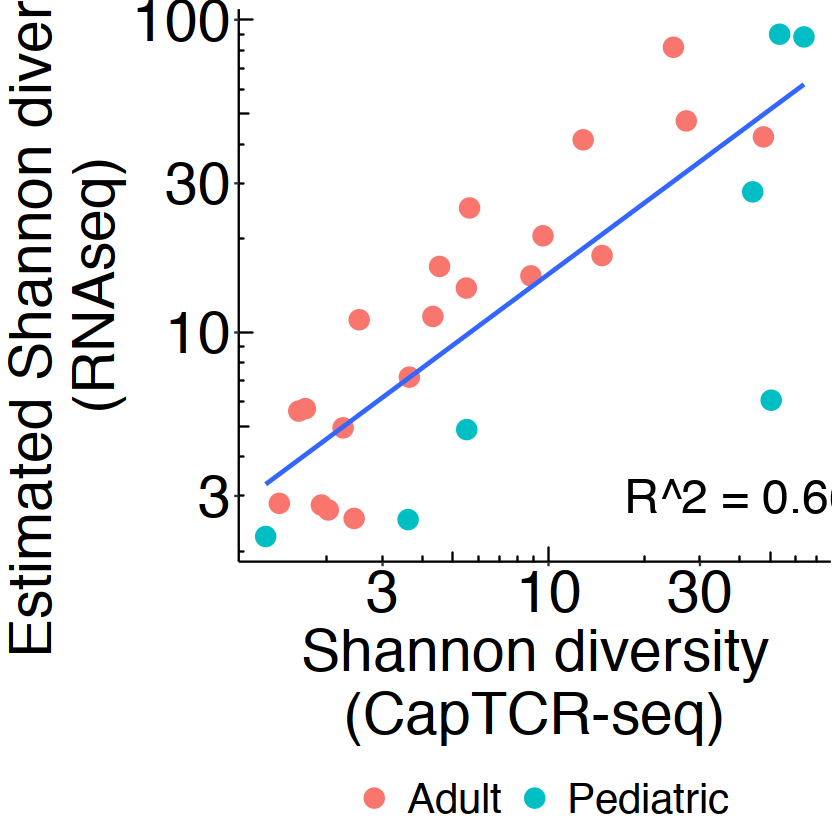

In [129]:
cap_rna_plot + annotate("text", x=40, y=3, label= "R^2 = 0.66", size = 10) 

In [130]:
pdf(file = paste0(plotpath,"RNAseq_CapTCR_TRB.pdf"),
        width = 10, height = 10,
        useDingbats = FALSE)
    print(cap_rna_plot + annotate("text", x=40, y=3, label= "R^2 = 0.66", size = 10) )
dev.off()


`geom_smooth()` using formula 'y ~ x'



pdf 
  2

In [131]:
summary(cap_rna$estimated_Shannon_RNAseq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.225   4.923  11.253  22.208  26.591  89.916 

In [132]:
lmreg_TRB <- lm(log10(estimated_Shannon_RNAseq) ~ log10(observed_Shannon_TCRCap), 
                data = cap_rna)

In [133]:
broom::glance(lmreg_TRB)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6626533,0.6491595,0.3031272,49.10774,2.404808e-07,1,-5.045091,16.09018,19.97769,2.297152,25,27


In [5]:
load(file = paste0(datapath,"PROFYLE_Div_bulk_TRA.RData"))
load(file = paste0(datapath, "PROFYLE_Div_bulk_TRB.RData"))

In [6]:
load(file = paste0(datapath,"PROFYLE_Div_cap_TRA.RData"))
load(file = paste0(datapath,"PROFYLE_Div_cap_TRB.RData"))

In [7]:
PROFYLE_Div_bulk_TRB

filename,TRB,Reads,Average_reads,Max_reads,IDis,Singletons,Doubletons,qD,estimated_Richness,observed_Richness,estimated_Shannon,observed_Shannon,estimated_Simpson,observed_Simpson,Divscore
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
_PRO-00012N_R_totalRNA_chondrosarcoma_40055,47,72,1.531915,17,1.5390531,39,5,81.288,196.988,47,89.916,30.566,17.388,14.164,5.289176
_PRO-00013P_R_totalRNA_osteosarcoma_40063,3,13,4.333333,10,1.1383576,1,1,3.399,3.462,3,2.225,1.988,1.696,1.610,0.222500
_PRO-00015S_R_totalRNA_sarcoma_40065,15,17,1.133333,3,0.4556451,14,0,27.859,100.647,15,88.167,14.004,12.565,12.565,29.389000
_PRO-00019W_R_totalRNA_Thymus_40073,1215,1421,1.169547,4,0.3615564,1030,166,2095.307,4408.233,1215,4409.446,1152.785,4405.721,1074.636,1102.361500


In [9]:
PROFYLE_Div_cap_TRB

filename,TRB,Reads,Average_reads,Max_reads,IDis,Singletons,Doubletons,qD,estimated_Richness,observed_Richness,estimated_Shannon,observed_Shannon,estimated_Simpson,observed_Simpson,Divscore
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PRO-00012N,1219,10222504,8385.975,1885593,7.824990,409,119,1529.080,1921.861,1219,61.538,61.532,19.604,19.604,3.263589e-05
PRO-00013P,13,57359,4412.231,35590,2.486470,3,1,15.190,17.500,13,2.125,2.125,1.938,1.938,5.970778e-05
PRO-00015S,610,2156721,3535.608,378633,6.155721,100,20,692.420,860.000,610,41.507,41.499,15.709,15.709,1.096233e-04
PRO-00023A,111,828065,7460.045,373985,4.829176,30,8,134.251,167.250,111,13.511,13.510,4.604,4.604,3.612712e-05
PRO-00027E,2,242,121.000,229,1.262273,0,0,2.000,2.000,2,1.235,1.233,1.114,1.113,5.393013e-03
PRO-00033M,28,118840,4244.286,31335,2.114446,6,5,30.920,31.600,28,6.000,5.999,5.272,5.272,1.914792e-04
PRO-00035O,6,66697,11116.167,66608,2.445569,3,1,8.190,10.500,6,1.011,1.011,1.003,1.003,1.517836e-05
PRO-00039T,27,389371,14421.148,214671,2.921789,3,3,28.297,28.500,27,4.681,4.681,2.928,2.928,2.180546e-05
PRO-00042X,25,133471,5338.840,128456,4.805610,3,2,26.657,27.250,25,1.244,1.243,1.079,1.079,9.684250e-06


In [10]:
ordershanTRB <- PROFYLE_Div_cap_TRB$filename[order(PROFYLE_Div_cap_TRB$observed_Shannon)]

ordershanTRA <- PROFYLE_Div_cap_TRA$filename[order(PROFYLE_Div_cap_TRA$observed_Shannon)]

In [11]:
PROFYLE_Div_cap_TRA$filename

[1] PRO-00012N PRO-00013P PRO-00015S PRO-00023A PRO-00032L PRO-00033M
 [7] PRO-00035O PRO-00039T PRO-00042X PRO-00043Z
10 Levels: PRO-00012N PRO-00013P PRO-00015S PRO-00023A ... PRO-00043Z

In [12]:
PROFYLE_Div_cap_TRA$observed_Shannon

[1] 103.594   5.213  51.676  45.806   2.502   9.029   4.943   5.669   1.561
[10]   8.801

In [13]:
PROFYLE_Div_cap_TRA$observed_Simpson

[1] 40.346  4.437 18.651 39.610  2.135  8.034  4.301  3.990  1.320  7.387

In [15]:
PROFYLE_Div_cap_TRA[order(PROFYLE_Div_cap_TRA$observed_Shannon),]

,filename,TRA,Reads,Average_reads,Max_reads,IDis,Singletons,Doubletons,qD,estimated_Richness,observed_Richness,estimated_Shannon,observed_Shannon,estimated_Simpson,observed_Simpson,Divscore
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,PRO-00042X,30,272841,9094.700000,234731,4.7417903,7,2,35.332,42.250,30,1.561,1.561,1.320,1.320,6.650166e-06
5,PRO-00032L,17,17602,1035.411765,9929,2.7200754,6,1,22.102,34.999,17,2.504,2.502,2.135,2.135,2.521906e-04
7,PRO-00035O,6,23,3.833333,8,0.6885507,1,1,6.414,6.478,6,5.642,4.943,5.060,4.301,7.052500e-01
2,PRO-00013P,75,2057580,27434.400000,604080,4.0147359,20,7,89.383,103.571,75,5.213,5.213,4.437,4.437,8.629652e-06
8,PRO-00039T,80,114288,1428.600000,39911,4.3923122,11,5,87.225,92.100,80,5.671,5.669,3.990,3.990,1.420912e-04
10,PRO-00043Z,43,235159,5468.813953,51568,2.2217414,5,3,45.912,47.167,43,8.802,8.801,7.387,7.387,1.706872e-04
6,PRO-00033M,48,261524,5448.416667,52874,2.2539316,12,4,56.758,66.000,48,9.031,9.029,8.035,8.034,1.708023e-04
4,PRO-00023A,144,544578,3781.791667,25608,1.6290669,36,10,171.621,208.800,144,45.815,45.806,39.613,39.610,1.789089e-03
3,PRO-00015S,651,2296620,3527.834101,386112,5.8272455,115,25,744.261,915.500,651,51.686,51.676,18.651,18.651,1.338627e-04


In [22]:
clonesTRB <- clonplotfx(paste0(datapath,"PROFYLE/TCRcap/"),"TRB", ordershanTRB,"PROFYLE")

In [23]:
clonesTRA <- clonplotfx(paste0(datapath,"PROFYLE/TCRcap/"),"TRA", ordershanTRB,"PROFYLE")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


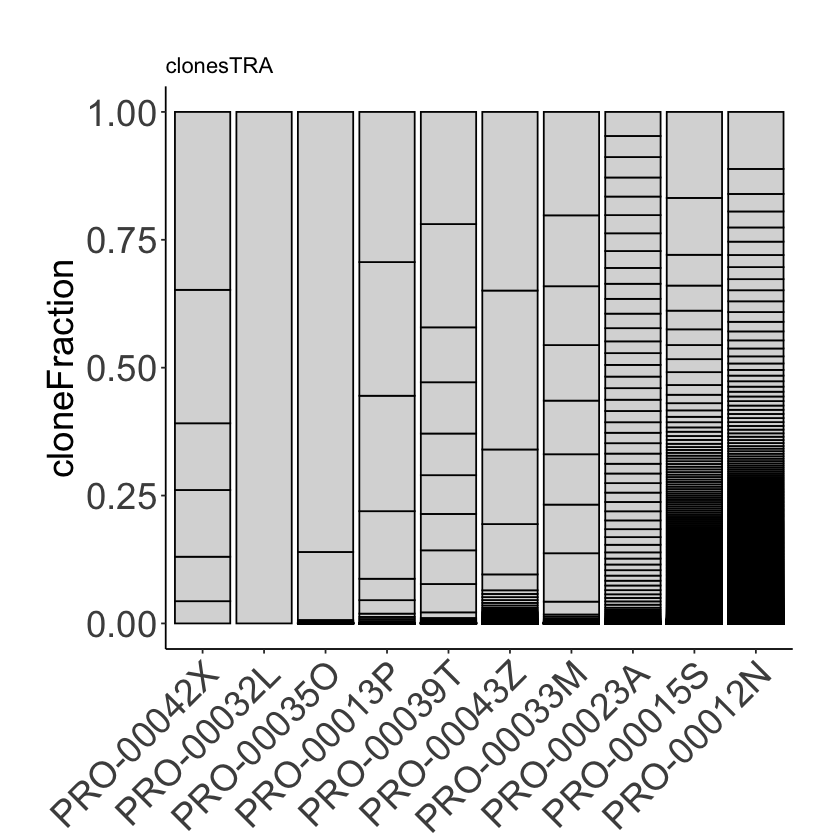

In [24]:
clonesTRA + scale_x_discrete(labels = ordershanTRA) + labs(title = "clonesTRA")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


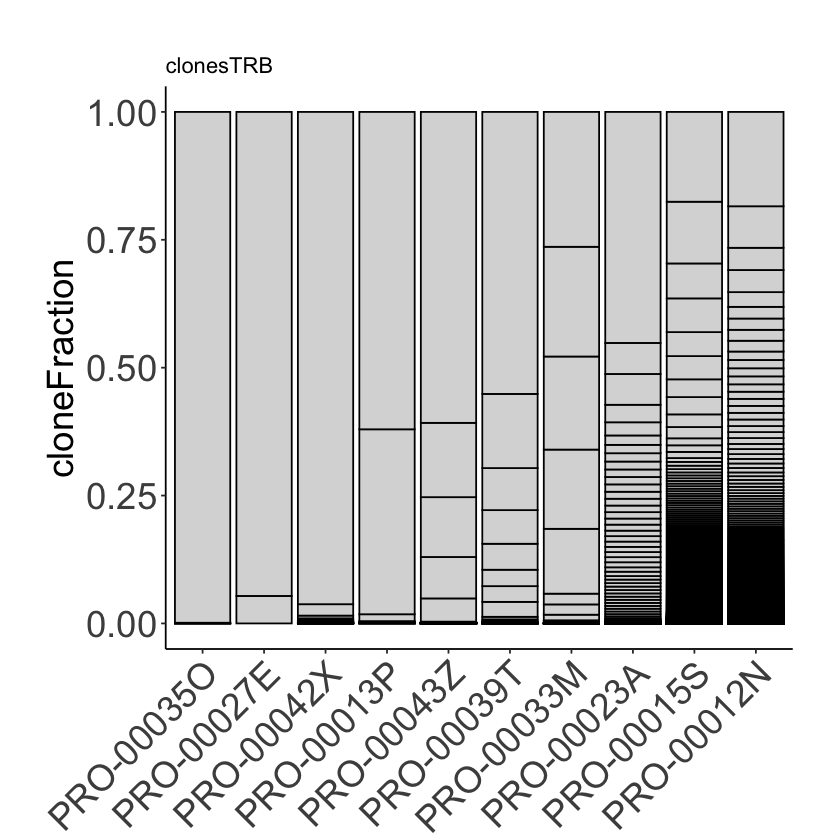

In [25]:
clonesTRB + scale_x_discrete(labels = ordershanTRB) + labs(title = "clonesTRB")

In [26]:
if(file.exists(paste(plotpath,"PROFYLE_clonesTRA.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"PROFYLE_clonesTRA.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(clonesTRA + labs(title = "clonesTRA"))
    dev.off()
    }

pdf 
  2

In [27]:
if(file.exists(paste(plotpath,"PROFYLE_clonesTRB.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"PROFYLE_clonesTRB.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(clonesTRB + labs(title = "clonesTRB"))
    dev.off()
    }

pdf 
  2

# Analysis of diversity measures

In [8]:
load(file = paste0(datapath,"NPC_PROFYLE_Div_bulk_cap_TRA.RData"))

load(file = paste0(datapath,"NPC_PROFYLE_Div_bulk_cap_TRB.RData"))

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file '/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/NPC_PROFYLE_Div_bulk_cap_TRA.RData', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [31]:
head(Div_TRA)

filename,cap_TRA,cap_Reads,cap_Average_reads,cap_Max_reads,cap_IDis,cap_Singletons,cap_Doubletons,cap_qD,cap_estimated_Richness,⋯,bulk_Doubletons,bulk_qD,bulk_estimated_Richness,bulk_observed_Richness,bulk_estimated_Shannon,bulk_observed_Shannon,bulk_estimated_Simpson,bulk_observed_Simpson,bulk_Divscore,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
107JP,62,99023,1597.1452,42267,3.776326,29,11,82.325,100.227,⋯,6,24.247,24.314,23,24.102,20.055,23.676,17.883,3.0127500,NPC
108W03,108,323717,2997.3796,45448,2.536044,58,10,157.057,276.199,⋯,3,43.243,76.307,29,44.419,23.948,31.429,20.364,8.8838000,NPC
10C02,322,33596,104.3354,11517,7.798831,146,61,420.959,496.716,⋯,1,12.153,14.359,10,10.227,8.169,8.857,7.111,1.4610000,NPC
111S03,71,150261,2116.3521,25757,2.706038,29,7,94.003,131.071,⋯,1,4.025,4.500,3,4.891,2.828,2.667,2.667,2.4455000,NPC
116JC,62,438883,7078.7581,51037,2.012853,31,6,87.705,142.083,⋯,3,22.165,22.165,22,22.191,19.978,22.440,18.664,2.4656667,NPC
119AY,34,332858,9789.9412,210780,3.818541,16,6,45.256,55.333,⋯,1,16.121,20.840,13,12.000,9.795,9.074,7.812,0.9230769,NPC


In [39]:
bulkcap_TRAplot_simp <- ggplot(data = Div_TRA,
                    aes(x = cap_observed_Simpson, 
                        y = bulk_estimated_Simpson)) +
geom_point(aes(color = group),
          size = 5) +
#plot format
theme(plot.title = element_text(size = 22),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent", 
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(0.5,0,0,0),"cm")) +
#axis
theme(axis.text = element_text(size = 24),
      axis.text.x = element_text( hjust = 1),
      axis.title = element_text(size = 28,
                                 margin = margin(r = 4, unit = "mm")),
      axis.line = element_line(color = "black")) +
#legends
theme(legend.position = "none",
      legend.key = element_rect(fill = "white", 
                                colour = "white"),
      legend.text = element_text(size = 20)) +
guides(colour = guide_legend(override.aes = list(alpha = 1, 
                                                 size = 8))) + 
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10") +
labs(y = "Inferred Simpson diversity (RNAseq)",
    x = "Simpson diversity (TCRcap)",
    title = "TRA diversity")

In [40]:
bulkcap_TRAplot_rich <- ggplot(data = Div_TRA,
                    aes(x = cap_observed_Richness, 
                        y = bulk_estimated_Richness)) +
geom_point(aes(color = group),
          size = 5) +
#plot format
theme(plot.title = element_text(size = 22),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent", 
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(0.5,0,0,0),"cm")) +
#axis
theme(axis.text = element_text(size = 24),
      axis.text.x = element_text( hjust = 1),
      axis.title = element_text(size = 28,
                                 margin = margin(r = 4, unit = "mm")),
      axis.line = element_line(color = "black")) +
#legends
theme(legend.position = "none",
      legend.key = element_rect(fill = "white", 
                                colour = "white"),
      legend.text = element_text(size = 20)) +
guides(colour = guide_legend(override.aes = list(alpha = 1, 
                                                 size = 8))) + 
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10") +
labs(y = "Inferred richness (RNAseq)",
    x = "Richness (TCRcap)",
    title = "TRA diversity")

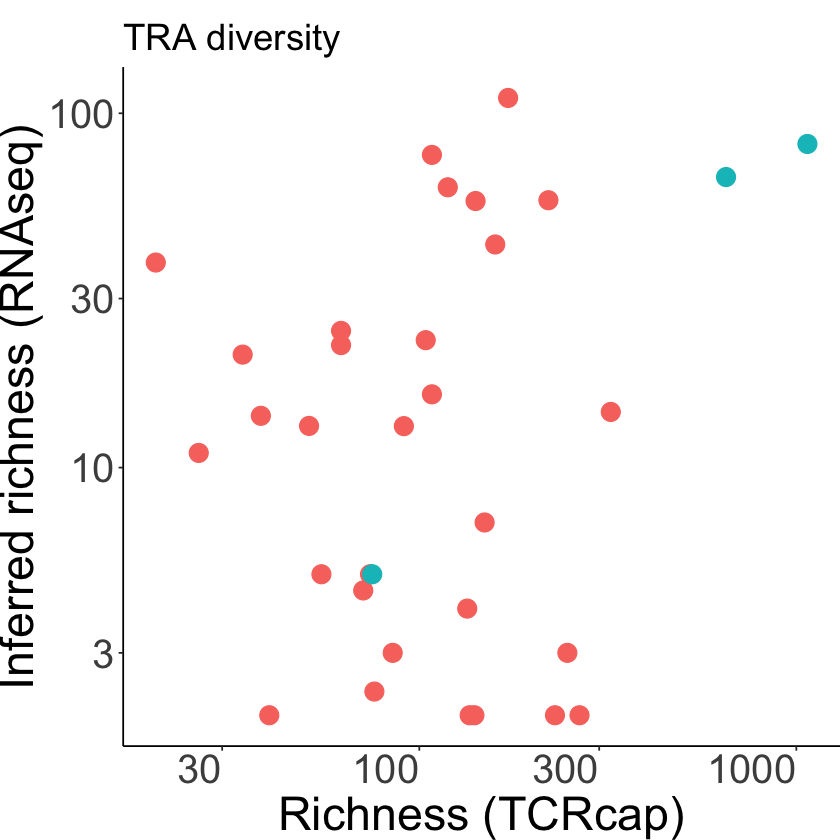

In [41]:
bulkcap_TRAplot_rich

In [68]:
if(file.exists(paste(plotpath,"osimp_esimp_NPC_PROFYLE_TRA.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"osimp_esimp_NPC_PROFYLE_TRA.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(bulkcap_TRAplot_simp + annotation_logticks(sides = "lb"))
    dev.off()
    }

file exists!


In [69]:
if(file.exists(paste(plotpath,"oshan_eshan_NPC_PROFYLE_TRA.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"oshan_eshan_NPC_PROFYLE_TRA.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(bulkcap_TRAplot_shan + annotation_logticks(sides = "lb"))
    dev.off()
    }

file exists!


In [59]:
if(file.exists(paste(plotpath,"orich_erich_NPC_PROFYLE_TRA.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"orich_erich_NPC_PROFYLE_TRA.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(bulkcap_TRAplot_rich + annotation_logticks(sides = "lb"))
    dev.off()
    }

pdf 
  2

In [74]:
bulkcap_TRBplot_rich <- ggplot(data = Div_TRB,
                    aes(x = (cap_observed_Richness), 
                        y = (bulk_estimated_Richness))) +
geom_point(aes(color = group),
          size = 5) +
#plot format
theme(plot.title = element_text(size = 22),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent", 
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(0.5,0,0,0),"cm")) +
#axis
theme(axis.text = element_text(size = 24),
      axis.ticks.x = element_blank(),
      axis.text.x = element_text( hjust = 1),
      axis.title = element_text(size = 28,
                                 margin = margin(r = 4, unit = "mm")),
      axis.line = element_line(color = "black")) +
#legends
theme(legend.position = "none",
      legend.key = element_rect(fill = "white", 
                                colour = "white"), 
      legend.text = element_text(size = 20)) +
guides(colour = guide_legend(override.aes = list(alpha = 1, 
                                                 size = 8))) + 
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10") +
labs(y = "Inferred richness (RNAseq)",
    x = "Richness (TCRcap)",
    title = "TRB diversity")

In [75]:
bulkcap_TRBplot_simp <- ggplot(data = Div_TRB,
                    aes(x = (cap_observed_Simpson), 
                        y = (bulk_estimated_Simpson))) +
geom_point(aes(color = group),
          size = 5) +
#plot format
theme(plot.title = element_text(size = 22),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent", 
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(0.5,0,0,0),"cm")) +
#axis
theme(axis.text = element_text(size = 24),
      axis.text.x = element_text( hjust = 1),
      axis.title = element_text(size = 28,
                                 margin = margin(r = 4, unit = "mm")),
      axis.line = element_line(color = "black")) +
#legends
theme(legend.position = "none",
      legend.key = element_rect(fill = "white", 
                                colour = "white"), 
      legend.text = element_text(size = 20)) +
guides(colour = guide_legend(override.aes = list(alpha = 1, 
                                                 size = 8))) + 
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10") +
labs(y = "Inferred Simpson diversity (RNAseq)",
    x = "Simpson diversity (TCRcap)",
    title = "TRB diversity")

In [90]:
bulkcap_TRBplot_shan <- ggplot(data = Div_TRB,
                    aes(x = (cap_observed_Shannon), 
                        y = (bulk_estimated_Shannon))) +
geom_point(aes(color = group),
          size = 5) +
#plot format
theme(plot.title = element_text(size = 22),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent", 
                                      colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(0.5,0,0,0),"cm")) +
#axis
theme(axis.text = element_text(size = 24),
      axis.text.x = element_text( hjust = 1),
      axis.title = element_text(size = 28,
                                 margin = margin(r = 4, unit = "mm")),
      axis.line = element_line(color = "black")) +
#legends
theme(legend.position = "none",
      legend.key = element_rect(fill = "white", 
                                colour = "white"), 
      legend.text = element_text(size = 20)) +
guides(colour = guide_legend(override.aes = list(alpha = 1, 
                                                 size = 8))) + 
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10") +
labs(y = "Inferred Shannon diversity (RNAseq)",
    x = "Shannon diversity (TCRcap)",
    title = "TRB diversity")

In [86]:
max(Div_TRB$cap_estimated_Simpson)

[1] 34.999

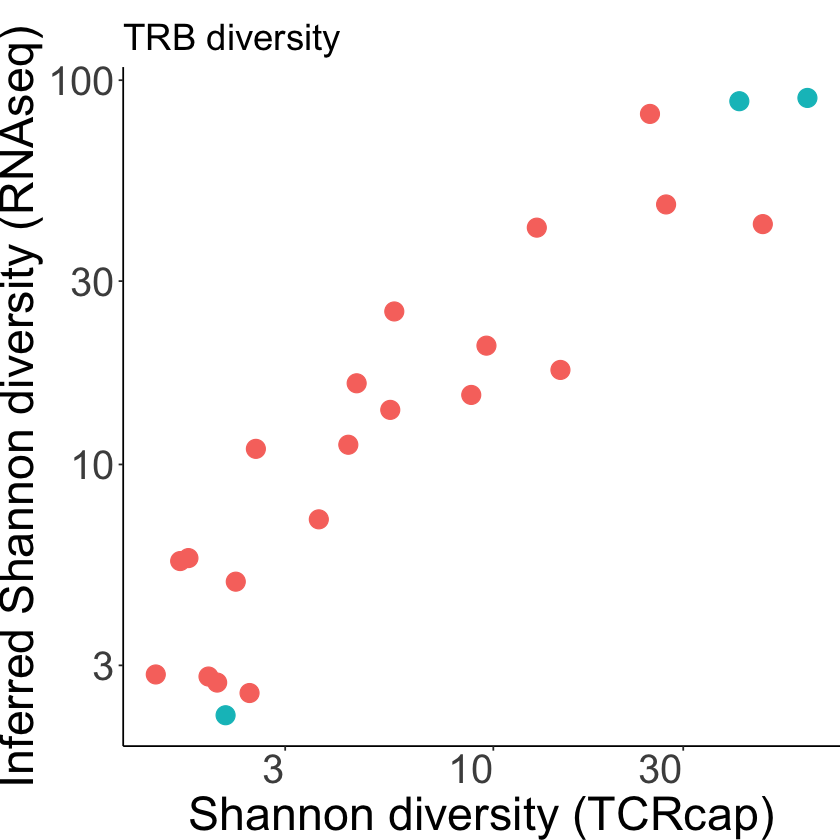

In [91]:
bulkcap_TRBplot_shan

In [79]:
if(file.exists(paste(plotpath,"osimp_esimp_NPC_PROFYLE_TRB.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"osimp_esimp_NPC_PROFYLE_TRB.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(bulkcap_TRBplot_simp + annotation_logticks(sides = "lb"))
    dev.off()
    }

pdf 
  2

In [80]:
if(file.exists(paste(plotpath,"orich_erich_NPC_PROFYLE_TRB.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"orich_erich_NPC_PROFYLE_TRB.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(bulkcap_TRBplot_rich + annotation_logticks(sides = "lb"))
    dev.off()
    }

pdf 
  2

In [81]:
if(file.exists(paste(plotpath,"oshan_eshan_NPC_PROFYLE_TRB.pdf", sep = ""))){
    message("file exists!")
}else{
    pdf(file = paste(plotpath,"oshan_eshan_NPC_PROFYLE_TRB.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(bulkcap_TRBplot_shan + annotation_logticks(sides = "lb"))
    dev.off()
    }

pdf 
  2

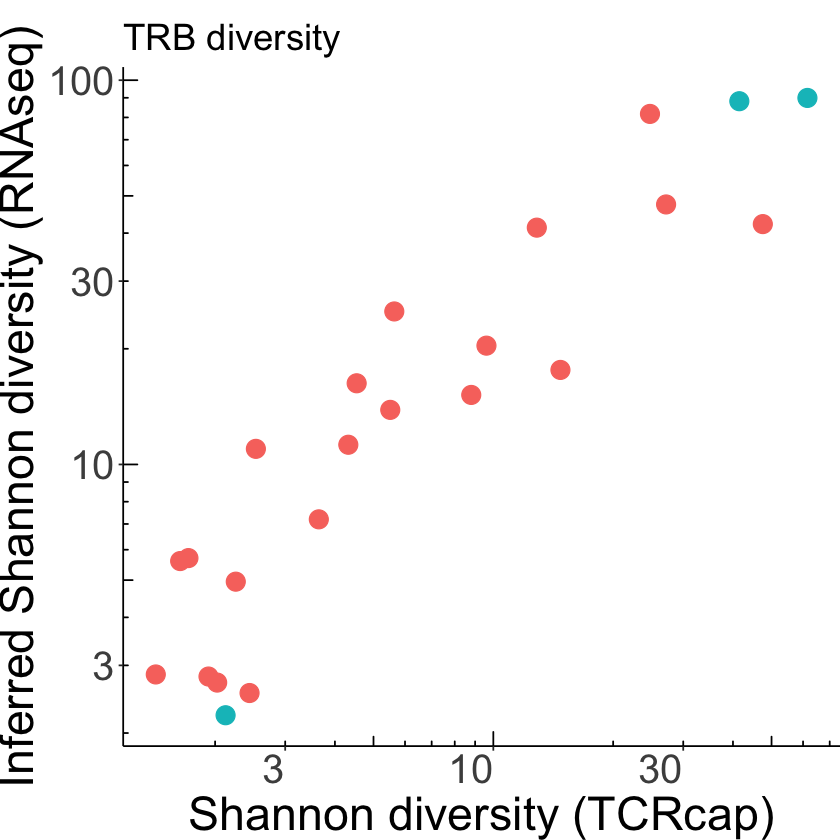

In [83]:
bulkcap_TRBplot_shan + annotation_logticks(sides = "lb")

## linear regression

In [66]:
lmreg_TRA_rich <- lm(bulk_estimated_Richness ~ cap_observed_Richness, data = Div_TRA)
lmreg_TRA_shan <- lm(bulk_estimated_Shannon ~ cap_observed_Shannon, data = Div_TRA)
lmreg_TRA_simp <- lm(bulk_estimated_Simpson ~ cap_observed_Simpson, data = Div_TRA)

lmreg_TRB_rich <- lm(bulk_estimated_Richness ~ cap_observed_Richness, data = Div_TRB)
lmreg_TRB_shan <- lm(bulk_estimated_Shannon ~ cap_observed_Shannon, data = Div_TRB)
lmreg_TRB_simp <- lm(bulk_estimated_Simpson ~ cap_observed_Simpson, data = Div_TRB)


In [67]:
glance(lmreg_TRA_rich)
glance(lmreg_TRA_shan)
glance(lmreg_TRA_simp)

glance(lmreg_TRB_rich)
glance(lmreg_TRB_shan)
glance(lmreg_TRB_simp)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.2028585,0.1771443,25.87559,7.888955,0.008532656,2,-153.1523,312.3046,316.7941,20755.93,31


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.6556894,0.6445826,15.86145,59.03498,1.149394e-08,2,-137.0018,280.0036,284.4932,7799.157,31


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.5159319,0.5003168,18.92679,33.04058,2.517063e-06,2,-142.8325,291.665,296.1545,11104.93,31


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.8646988,0.8582559,16.63847,134.2093,1.389909e-10,2,-96.25892,198.5178,201.9243,5813.615,21


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.7710513,0.7601489,13.69583,70.72359,3.663709e-08,2,-91.78251,189.565,192.9715,3939.09,21


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.5107369,0.4874386,16.08662,21.92169,0.0001273898,2,-95.48314,196.9663,200.3728,5434.368,21
